# Automatic Labeling of Motion Capture Markers
These scripts take care of <b>automatically labeling the data collected from markers of a motion capture system</b>, according to the names given in the first frame. 

### Data Format
For the scripts to work, the motion capture files must fulfill the following criteria  (see example log file): </b>
- comma separated value (csv) files
- the first 6 lines are header lines where the 4th line contains the marker names, replicated 3 times each, starting from the third column on
- the following lines contain the x-y-z data of each marker, preceded by the frame number and time

### Working principle
The labeling is based on a <b>nearest neighbor approach</b> with some additional heuristics and features to make it more robust. In every frame a point is labeled according to the nearest marker from the previous frame independent of its given label, but only if:
- there is no other point closer to that marker, otherwise it's marked as missing for that frame
- the point is within a threshold distance of the marker, which is higher if the marker was missing in the previous frame
- the point is within a threshold distance of the bounding box around all markers in the previous frame (ignores noise reflections in the tracking environment)

### Missing data and skeleton
A <b> Skeleton </b> can be defined by assigning maximum 1 child and 1 parent marker to each marker. The skeleton is used to <b>extrapolate</b> the position of a missing marker based on the previous frame. The extrapolation computes two new positions based on the new position of the child and parent markers and the previous vectors between the child/parent and the marker in the previous frame, and averages between those 2 positions. 

If a marker is missing, it is assumed to stay at the previous position, if no child or parent markers are available.

### Hardcoded heuristics for hands
Finally, there are <b>2 hardcoded heuristics for correcting swapped markers</b> IF the collected data comes from hands and the marker names correspond to names such as "Hands_R_L4", where:
- each finger has 4 markers on each of the 3 joints and the fingertip
- all names start with "Hands_"
- the first single letter is R or L, corresponding to the Right or Left hand
- the second letter is one of T, I, M, R, or L, correspnding to the Thumb, Index, Middle, Ring and Little finger
- the number is between 1-4 and increases from the MCP joint (1) to the fingertip (4)

The heuristics detect cases where markers of neighboring fingers are swapped, or the fingertip and DIP markers on one finger. In the first case, the corresponding bones (lines between a parent and child marker) of the two fingers cross each other in 3D space (or are very close together), in the second case the fingertip is bend backwards in an unnatural way and the joint angle of the DIP joint is very small (can't be smaller than 90 degree).

### Validation and manual labeling
The <b> labeled data is plotted every 10000 frames </b> and the plot is saved for inspection. 

<b>If the automatic process fails, it can be supported manually in 2 ways: </b>
1. The user can manually label all markers in single frames and define them as <b>fallback frames</b>. For those, the user guarantees that all markers are present and given the correct label. Then the automatic labeling relies on the given label continues from that point as described above.
2. <b>Fully labeled markers</b> can be defined, for which the user guarantees that they are correctly labeled throughout the whole take. Every point labeled with the name of the marker in the motion capture file, is labeled as such by the algorithm and not based on the nearest neighbor approach.

## Running the scripts
To run the labeling process for a given file, simply create a new <code> Take </code> object with the filename as the only required argument. It takes care of:
- Labeling the given data
- Writing the labeled data to a new csv file in the same format
- Plotting the data every 10000 frames and saving the file in the <code> IMG </code> folger for inspection

In addition, the following arguments can be defined to modify the labeling process as described above (default values given):
- <code><b>fallback_frames = []</b></code> <br> A list of fallback frames at which the captured data is labeled correctly
- <code><b>labeled_marker_names = []</b></code> <br> A list of marker names that the algorithm can assume to be labeled correctly <i> throughout  the complete file </i>
- <code><b>check_hand_skeleton_heuristics = 0</b></code> <br> Binary value indicatinf if the heuristics for checking for swapped hand markers should be used. Set only to 1 if the marker are named as described above
- <code><b>use_skeleton = 1</b></code> <br> Binary value indicating if a skeleton should be used. If set to 1, the parent-child relations must be adapted in the file <code> skeleton.py </code> according to the given marker names. See the file for further info.
- <code><b>debug = 1</b></code><br> Binary value indiciating if the saved plots should indicate the names of the markers relabeled at that frame 
- <code><b>ignore_marker_names = []</b></code><br> A list of marker names that should be ignored during the relabeling (e.g. markers put for reference or on devices)
- <code><b>plot_every_X_frames = 10000</b></code><br> Integer that defines the frame interval for plotting the data for manual inspection. Data is plotted for the first and last frame and then every <code>plot_every_X_frames</code> frames. 
- <code><b>plot_xlim, plot_ylim, plot_zlim = (-0.5,0.5)</b></code><br> Tuple with lower and upper limit of x,y, and z axis for plotting the motion capture data

The labeled logfile is saved to the same folder as the given logfile and marked as "_labeled". The reference images are saved to the <code> IMG </code> folder

In [1]:
from Take import *


# the only required argument is the filename:
logfile = "Logfiles/test.csv"

# the following arguments can be given to control the labeling process, see the file Take.py for further description
fallback_frames = []
labeled_marker_names=[]
check_hand_skeleton_heuristics=0
use_skeleton=1
debug =1
ignore_marker_names=[]
plot_every_X_frames = 10000

# Create the Take object, which takes care of labeling, plotting and writing the new logfile. 
# Note that only the first argument is required and all others are optional. For the default values, simply write
#t = Take(logfile)

t = Take(logfile, 
         fallback_frames = fallback_frames,
         labeled_marker_names = [], 
         check_hand_skeleton_heuristics = 0,
         use_skeleton = 1,
         debug = 1,
         ignore_marker_names = [],
         plot_every_X_frames = 10000
        )

START LABELING
Frame 1000 / 5751
Frame 2000 / 5751
Relabeled:  Hands_R_T4 to Marker_36285 at frame 2212
Marker Hands_R_T4 was missing for 16 frames
Relabeled:  Marker_36285 to Hands_L_T4 at frame 2219
Marker Hands_R_T4 was missing for 5 frames
Relabeled:  Hands_L_T4 to Hands_L_T4 at frame 2220
Marker Hands_L_T4 was missing for 1 frames
Relabeled:  Hands_L_T4 to Hands_L_T4 at frame 2221
Marker Hands_R_T4 was missing for 1 frames
Relabeled:  Hands_L_T4 to Hands_L_T4 at frame 2222
Marker Hands_L_T4 was missing for 1 frames
Relabeled:  Hands_L_T4 to Hands_L_T4 at frame 2252
Marker Hands_R_T4 was missing for 30 frames
Relabeled:  Hands_L_T4 to Hands_L_T4 at frame 2253
Marker Hands_L_T4 was missing for 1 frames
Relabeled:  Hands_L_T4 to Hands_L_T4 at frame 2254
Marker Hands_R_T4 was missing for 1 frames
Relabeled:  Hands_L_T4 to Hands_L_T4 at frame 2264
Marker Hands_L_T4 was missing for 10 frames
Relabeled:  Hands_L_T4 to Hands_L_T4 at frame 2265
Marker Hands_R_T4 was missing for 1 frames
Re

### Further functionalities
The <code> Take </code> object can then be used to plot any given frame for inspection of the labeled data, by using  <br>
<code>plotAt(frame, filename="")</code><br>
By default the plot is displayed and not saved. <code>filename = ""</code> Defines the filename for saving the plot. If given, the plot is not shown to the user but only saved. 
The lower and upper limits of the x,y, and z axis can be quickly changed by setting the <code>PLOT_X_LIM, PLOT_Y_LIM, PLOT_Z_LIM</code> properties of the <code>Take</code> object. 

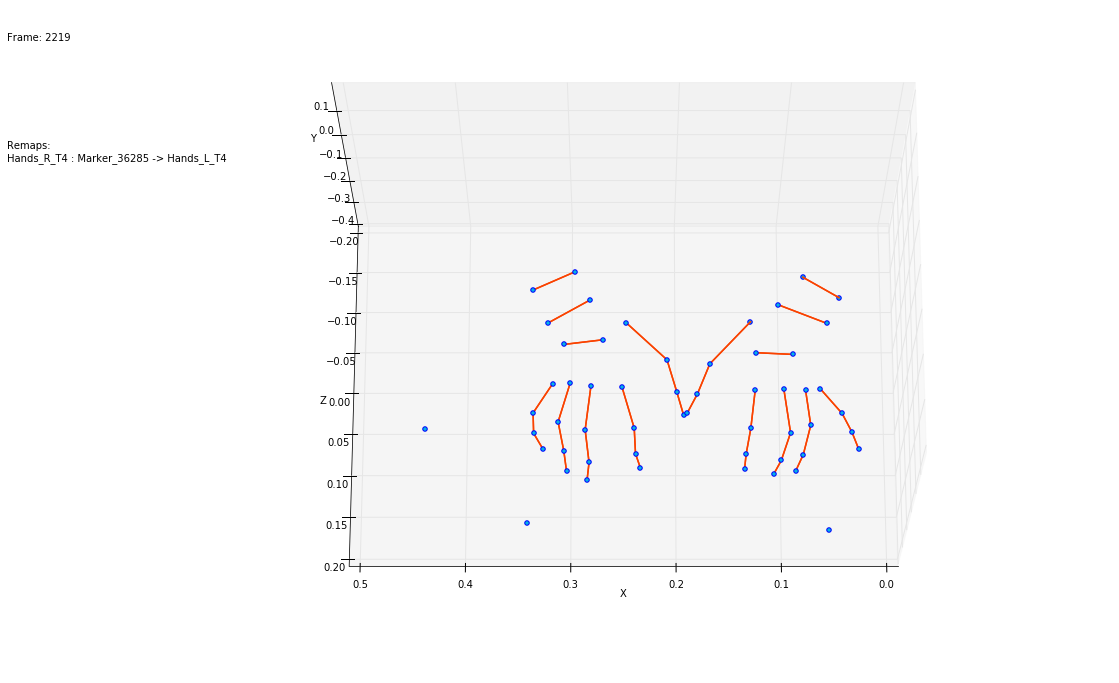

In [2]:
%matplotlib inline

t.PLOT_X_LIM = (0.0,0.5)
t.PLOT_Y_LIM = (-0.2,0.2)
t.PLOT_Z_LIM = (-0.4,0.2)

t.plotAt(2219)